In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import pearsonr

Hypothesis: 

In [2]:
merged_cpi_lego = pd.read_csv('../Data Science Capstone Project 2/complete_lego_price_CPI.csv')

In [3]:
merged_cpi_lego.drop(columns=['Unnamed: 0'], inplace=True)
merged_cpi_lego

,Number,Theme,Subtheme,Year,Set name,Minifigs,Pieces,RRP (USD),Value new (USD),Value used (USD),Launch date,Exit date,CPI Mean
0,10-2,Basic,NaN,1976,"Basic Building Set, 3+",NaN,152.0,2.75,78.41,18.71,NaN,NaN,204.530769
1,555-1,LEGOLAND,NaN,1976,Hospital,7.0,202.0,15.00,NaN,157.50,NaN,NaN,204.530769
2,697-1,LEGOLAND,NaN,1976,Stage Coach,1.0,95.0,5.00,83.61,14.69,NaN,NaN,204.530769
3,1011-1,Dacta,NaN,1976,LEGO Number/Symbol Blocks,NaN,100.0,32.00,NaN,NaN,NaN,NaN,204.530769
4,1017-1,Dacta,NaN,1976,Letter Bricks for Wall Board,NaN,150.0,48.00,NaN,NaN,NaN,NaN,204.530769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11739,ISBN9780241610589-1,Books,Dorling Kindersley,2023,LEGO Harry Potter Ideas Book,NaN,NaN,24.99,NaN,NaN,NaN,NaN,436.901846
11740,ISBN9780241621424-1,Books,Dorling Kindersley,2023,LEGO Marvel: Visual Dictionary,NaN,5.0,24.99,NaN,NaN,NaN,NaN,436.901846
11741,ISBN9780744081756-1,Books,Dorling Kindersley,2023,"LEGO Harry Potter: Character Encyclopedia, New...",NaN,6.0,21.99,NaN,NaN,NaN,NaN,436.901846
11742,ISBN9780744084641-1,Books,Dorling Kindersley,2023,"LEGO NINJAGO: Secret World of the Ninja, New E...",NaN,6.0,19.99,NaN,NaN,NaN,NaN,436.901846


We are trying to figure out the relationship the variables have with each other. Histogram and heatmap can demonstrate this. 

<Figure size 1500x1500 with 0 Axes>

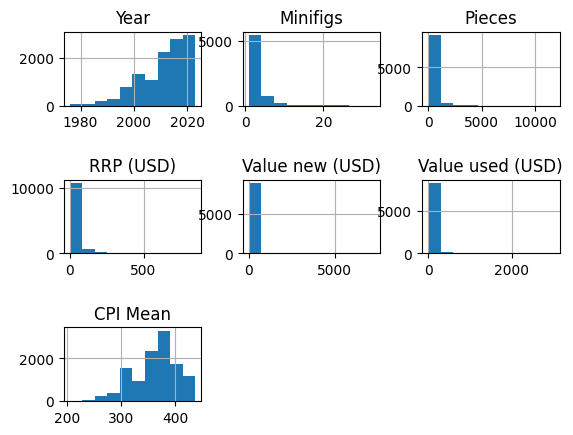

In [4]:
plt.figure(figsize=(15,15));
merged_cpi_lego.hist();
plt.subplots_adjust(hspace=1);

In [5]:
print(merged_cpi_lego['RRP (USD)'] )
merged_cpi_lego['RRP (USD)'] = merged_cpi_lego['RRP (USD)'] *10
print(merged_cpi_lego['RRP (USD)'] )

0         2.75
1        15.00
2         5.00
3        32.00
4        48.00
         ...  
11739    24.99
11740    24.99
11741    21.99
11742    19.99
11743    49.99
Name: RRP (USD), Length: 11744, dtype: float64
0         27.5
1        150.0
2         50.0
3        320.0
4        480.0
         ...  
11739    249.9
11740    249.9
11741    219.9
11742    199.9
11743    499.9
Name: RRP (USD), Length: 11744, dtype: float64


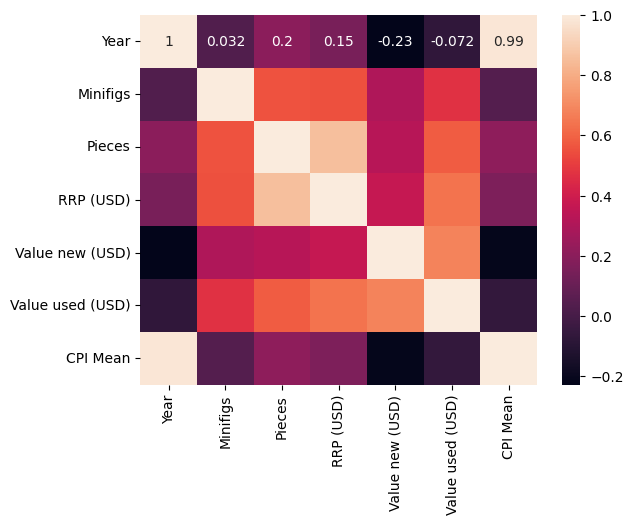

In [18]:
sns.heatmap(merged_cpi_lego.corr(numeric_only=True),annot=True);

Based on the heat map, there is a low relationship between majority of the variables with the cpi_mean

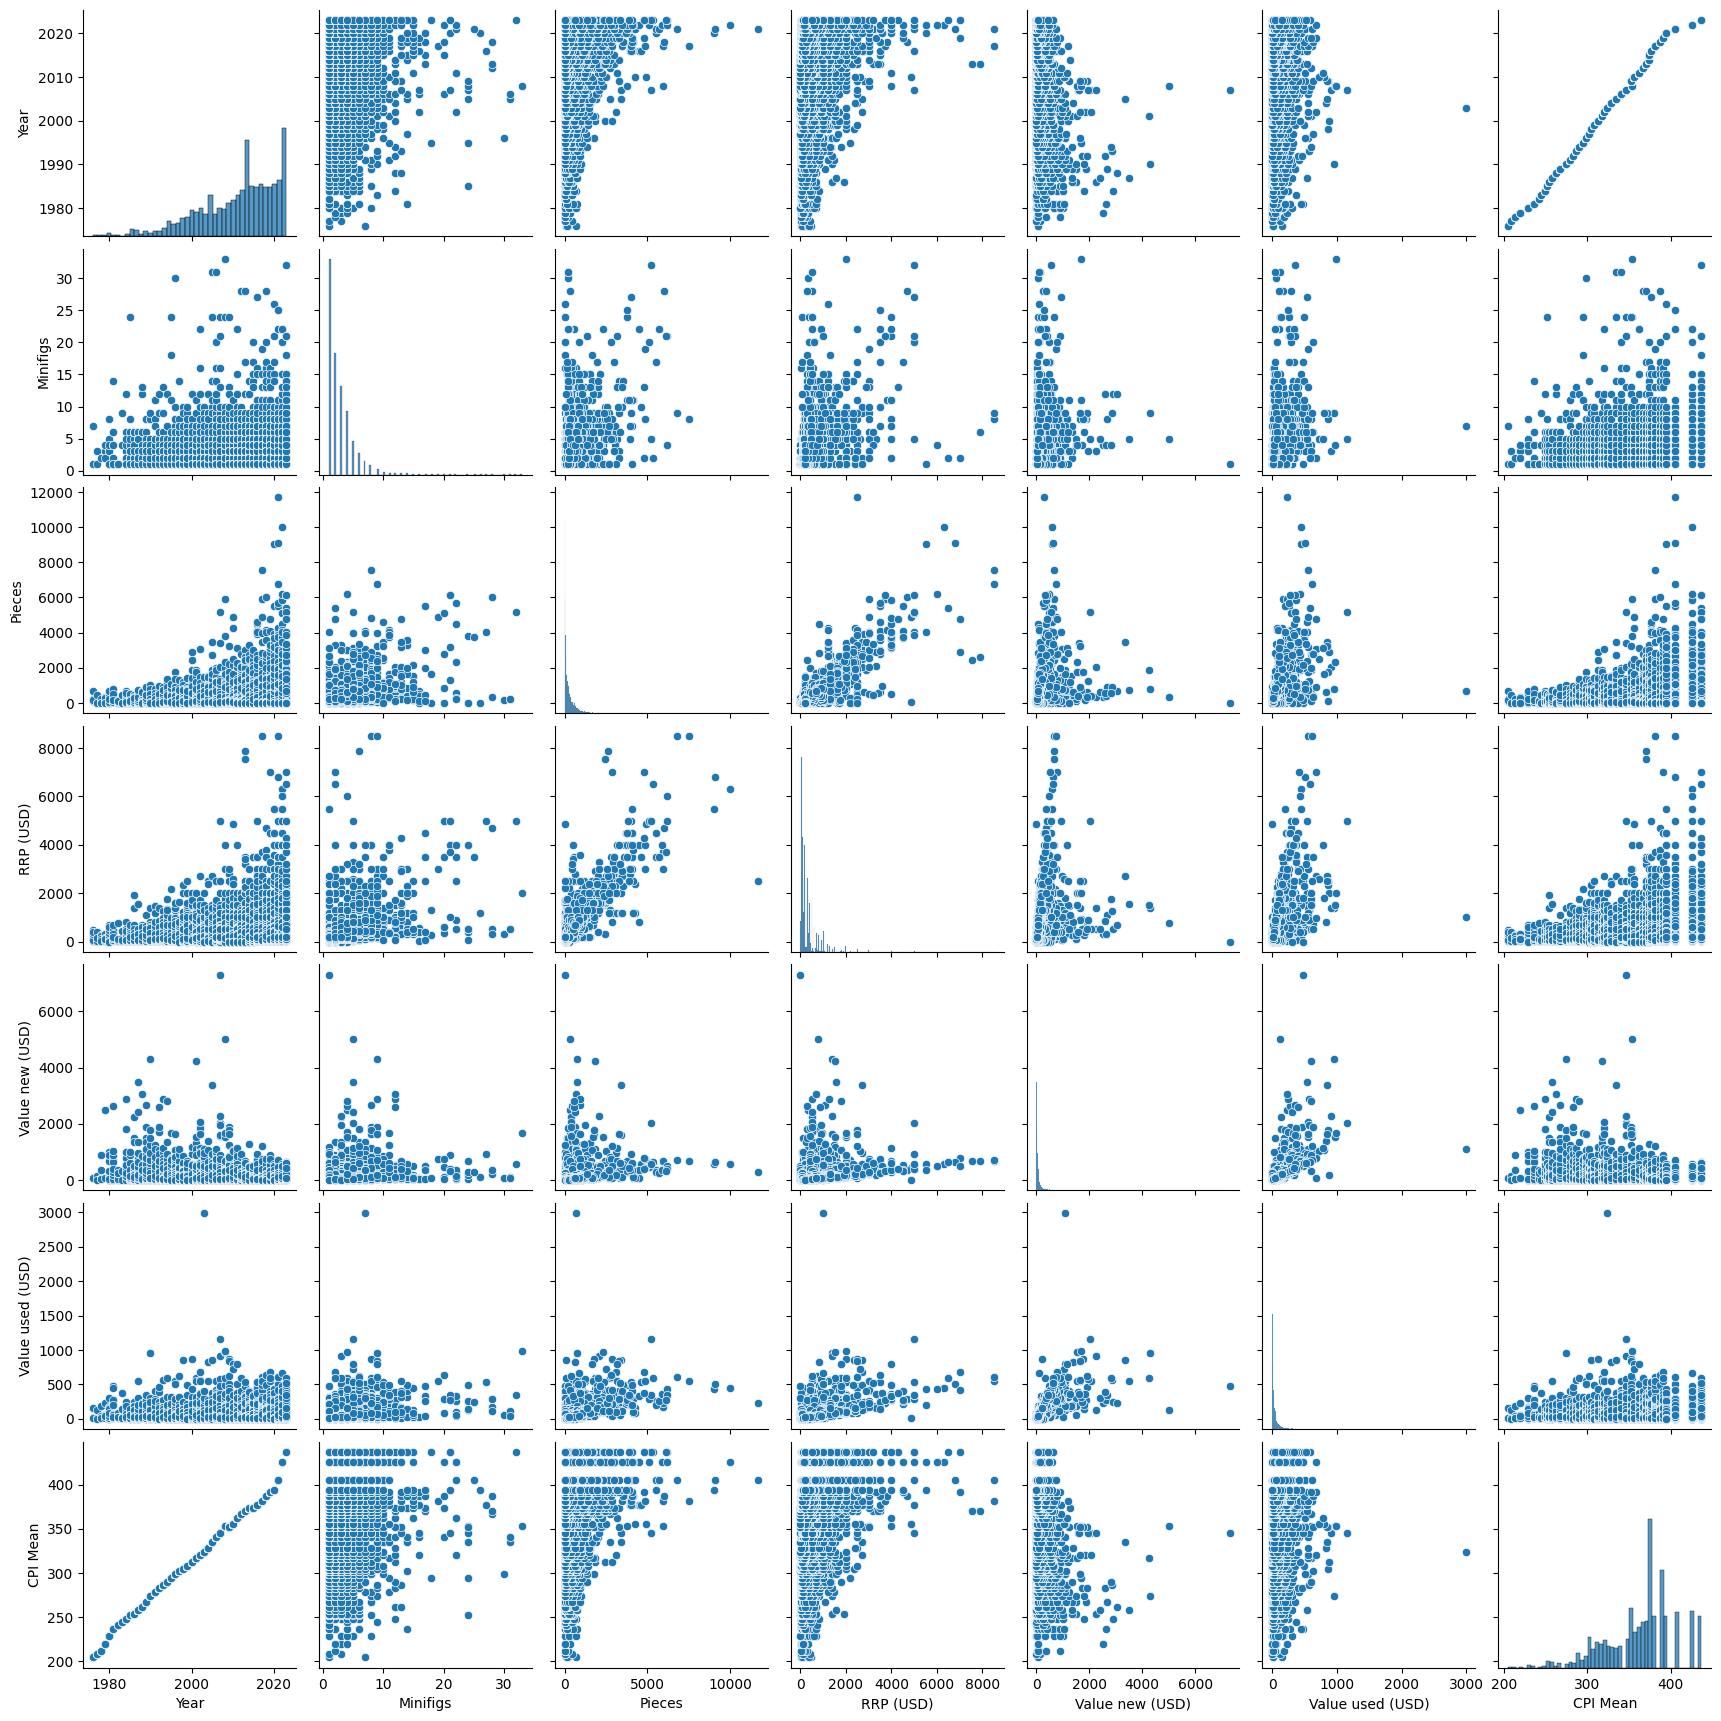

In [25]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot(merged_cpi_lego.select_dtypes(include=['number']))

Extract cpi mean and average RRP for visualization

In [13]:
cpi_mean = merged_cpi_lego.groupby('Year')['CPI Mean'].mean()
average_RRP =  merged_cpi_lego.groupby('Year')['RRP (USD)'].mean()

A plot of CPI mean and Average RRP(*10) vs time

Text(0, 0.5, 'Price')

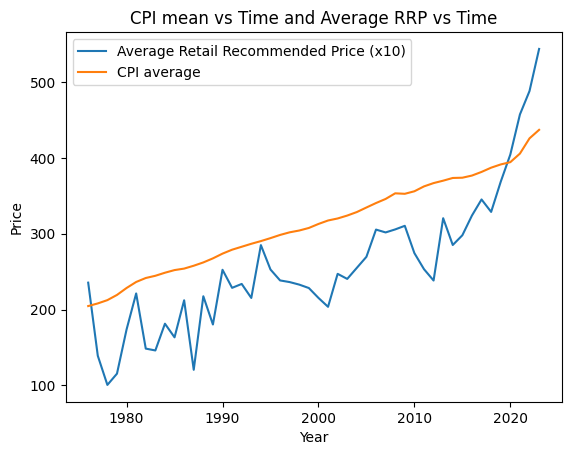

In [14]:
plt.plot(merged_cpi_lego['Year'].unique(),average_RRP, label = 'Average Retail Recommended Price (x10)');
plt.plot(cpi_mean, label='CPI average');
plt.legend()
plt.title('CPI mean vs Time and Average RRP vs Time')
plt.xlabel('Year')
plt.ylabel('Price')

The graph above shows an overall increasing pattery of both the CPI mean and average retail suggested price. 

In [8]:
np.corrcoef(cpi_mean, average_RRP)

array([[1.        , 0.87348573],
       [0.87348573, 1.        ]])

0.87 indicated a high correlation between the suggested retail price with the the CPI. 
